In [1]:
import numpy as np # Python math
import matplotlib.pyplot as plt # plotting graphs
# from matplotlib import animation as ani # animations
import pandas as pd # data reading

# import seaborn as sns #to create a probability density function

# google colab to read a file
# our CSV
# from google.colab import files
# print("Please upload \'g26perrindata.csv\'")
# uploaded = files.upload()


# the below must be used to use animations in Jupyter Notebooks
# %matplotlib ipympl
# if the above line is not needed (like using Spyder), it may be commented out

# random normal number generator
rng = np.random.default_rng()
rand = rng.random

# Random Walks and Diffusion
## Cedric Romero and Beatrice Pierson

# 0: An Introduction
We define a random walk as such:
1. Consider a particle that starts at the origin of $\mathbb{R}^{n}$. For our examples, we will use $\mathbb{R}$ (the number line) and $\mathbb{R}^2$ (the $xy$ plane).
2. Toss a coin, or perfom an equivalent event that has a success/fail outcome. Assign some movement to a "success" and a separate movement for a "fail".
3. Let the particle move according the outcome for step 2.
4. Repeat the process for $m$ steps.
5. Calculate the particle's final distance from the origin to its final place after $m$ steps.

For example, a particle travels along a number line and moves three steps total ($m = 3$). Let $d$ be the particle's distance from the origin. The particle starts at $d = 0$, and we toss a fair coin. Define heads to move the particle $1$ in the positive direction ($d \mapsto d+1$) and tails to move $1$ in the negative direction ($d \mapsto d - 1$). Consider the following movement:
- On toss $1$, we get tails. So $d = 0 - 1 = -1$.
- On toss $2$, we get tails again. So $d = -1 - 1 = -2$.
- On toss $3$, we get heads. So $d = -2 + 1 = -1$.

We record the final value of $d$ as $\left| (-1) - 0 \right| = 1$.

# 1: Show the Random Walk

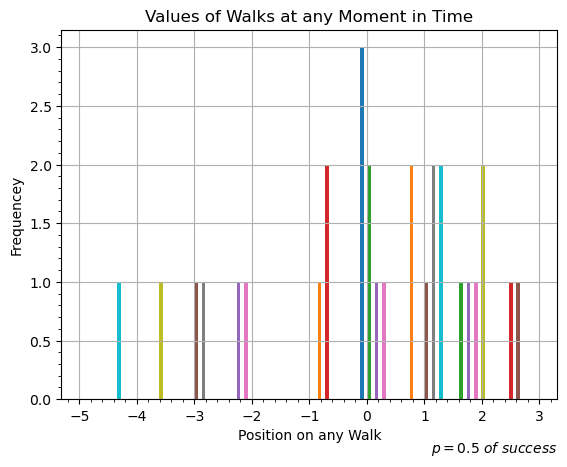

In [2]:
def take_linear_walk(number_trials, p_success = 0.5, step_x = 1):
    """
    Take some number of steps on a line given by number_trials.
    A success is defined as a random number less than p_success

    Returns final position of a particle
    """
    # probabilities must lie between 0 and 1; check first
    if ((p_success > 1) or (p_success < 0)):
      raise ValueError("Probability must be between 0 and 1, but recieved value", p_success)

    # cool; we can actually walk
    counter = 0
    walk_value = 0
    walk_array = np.zeros(number_trials)
    while (counter < number_trials-1):
        # create a randomly generated number
        trial_output = rand()
        # determine if success
        # if we make a random number less than our probability, we succeed
        is_success = (trial_output < p_success)
        # take a walk depending on above
        if (is_success):
            # if we got a success, take one step to the left +1
            walk_value += step_x
        else:
            # we got a failure, take one step to the right -1
            walk_value -= step_x
        # add this walk value to the walk
        walk_array[counter+1] = walk_value
        # update counter
        counter += 1
    return walk_array

# let's test
number_walks = 10
number_trials = 3
current_probability = 0.5
# array of walks
# walk 1: 0 +1 0 -1 0 ...
# walk 2: 0 -1 -2 -1 -2 ...
# walk 3: 0 +1 +2 +3 + 4 ...
# walk 4: 0 -1 0 +1 +2 ...
# walk 5: 0 +1 0 -1 -2 ...
# ...
walk_array = np.zeros((number_trials, number_walks), dtype = int)
for i in range(0, number_trials):
  # let's take some walks
  walk_array[i, :] = take_linear_walk(number_walks, current_probability)

plt.hist(walk_array)
plt.xlabel('Position on any Walk')
plt.ylabel('Frequencey')
plt.title('Values of Walks at any Moment in Time')
plt.figtext(0.9, 0, r"$p = {}$ of success".format(current_probability),
            horizontalalignment = 'right', fontstyle = 'italic')
plt.grid(True)
plt.minorticks_on()
plt.show()

This walk is fairly balanced. Being in the middle $(-1 \lesssim d \lesssim 1)$ is much more frequent than being at the edges. In fact, it seems mostly Gaussian to try and stay in the middle.

Now consider if we made it more likely to have a success. Say $p = 0.8$ of talking a step to the left, with all else constant.

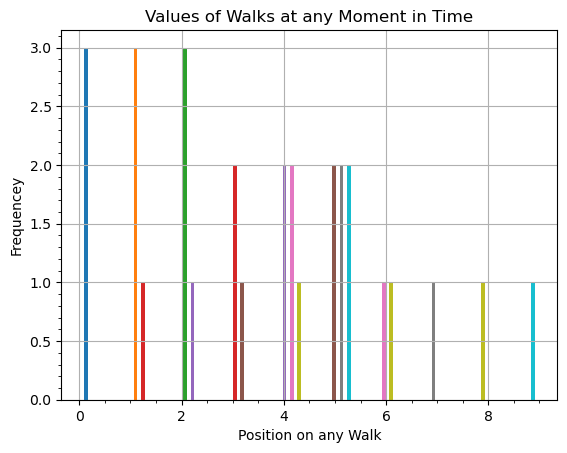

In [3]:
# let's test
number_walks = 10
number_trials = 3
current_probability = 0.8

walk_array = np.zeros((number_trials, number_walks), dtype = int)
for i in range(0, number_trials):
  # let's take some walks
  walk_array[i, :] = take_linear_walk(number_walks, current_probability)

plt.hist(walk_array)
plt.xlabel('Position on any Walk')
plt.ylabel('Frequencey')
plt.title('Values of Walks at any Moment in Time')
plt.grid(True)
plt.minorticks_on()
plt.show()

Now we are much more likely to walk to the right. From our definition, a success take us to the right, and we see that reflected in our histogram.

What if we went the other way, and made it much *less* likely to succeed? Maybe not even by a lot, say $p= 0.45$.

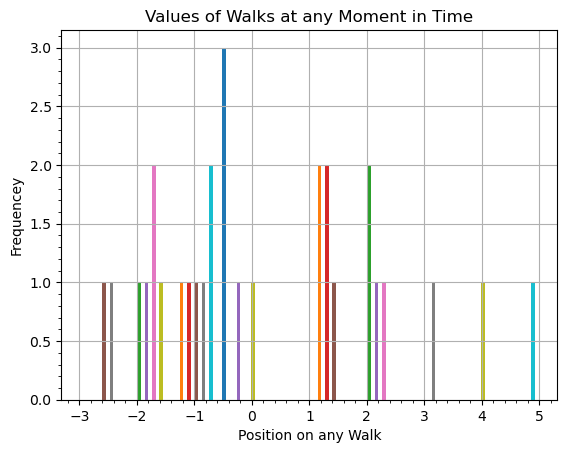

In [4]:
# let's test
number_walks = 10
number_trials = 3
current_probability = 0.45

walk_array = np.zeros((number_trials, number_walks), dtype = int)
for i in range(0, number_trials):
  # let's take some walks
  walk_array[i, :] = take_linear_walk(number_walks, current_probability)

plt.hist(walk_array)
plt.xlabel('Position on any Walk')
plt.ylabel('Frequencey')
plt.title('Values of Walks at any Moment in Time')
plt.grid(True)
plt.minorticks_on()
plt.show()

Conversely, we are more likely to skew left (negative) if we are less likely to succeed, even by a miniscule amount.
***

# 2: Jean Perrin's data on Brownian motion

In his work *Les Atomes*, Jean Perrin studies Brownian motion of atoms and molecules within a closed container. We study his data set and simulate some of our two dimensional walks to compare.

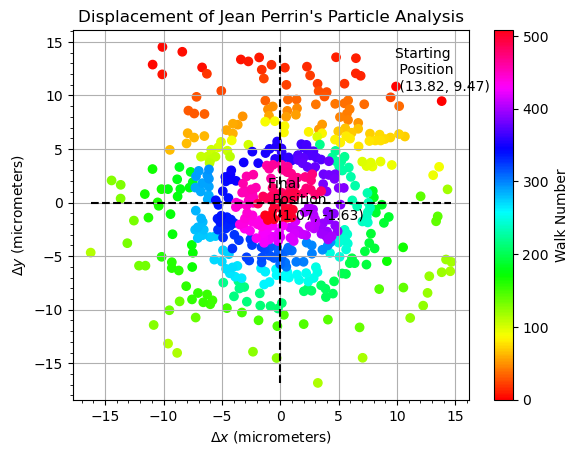

First five rows of Perrin's data, with added "Displacement" column: 



,x value,y value,Displacement
0,13.823692,9.471008,16.756923
1,9.917501,10.833091,14.687161
2,-10.091932,14.529215,17.690256
3,-10.930425,12.878684,16.891853
4,-8.390759,14.076306,16.387411


In [5]:
# col0 is x values, col1 is y values; every other column in NA and not needed
brownian_walk_data = pd.read_csv('g26perrindata.csv', usecols = [0, 1])
# title each column
brownian_walk_data = brownian_walk_data.set_axis(['x value', 'y value'], axis = 'columns')
x_value_bwdt = brownian_walk_data['x value'].values
y_value_bwdt = brownian_walk_data['y value'].values

# get first and last values
starting_x, starting_y = x_value_bwdt[0], y_value_bwdt[0]
ending_x, ending_y = x_value_bwdt[-1], y_value_bwdt[-1]
# get length of value
perrins_walk = len(x_value_bwdt)

# add column of final displacement
brownian_walk_data['Displacement'] = np.sqrt( brownian_walk_data['x value']**2 + brownian_walk_data['y value']**2 )

# print first 5 values
# print("First Five x values of Perrin's data", x_value_bwdt[0:5])
# print("First Five x values of Perrin's data", y_value_bwdt[0:5])

# color array to plot time
# at least until I can annimate
z_colors = np.linspace(0, perrins_walk, len(x_value_bwdt))
plt.scatter(x_value_bwdt, y_value_bwdt, c = z_colors, cmap = 'hsv')
# you gotta show what the colors mean!
plt.colorbar(label = 'Walk Number')
plt.title("Displacement of Jean Perrin\'s Particle Analysis")
plt.xlabel(r"$\Delta x$ (micrometers)")
plt.ylabel(r"$\Delta y$ (micrometers)")
# annotate starting and final position
plt.text( starting_x-4, starting_y+1, "Starting \n Position \n ({:.2f}, {:.2f})".format(starting_x, starting_y) )
plt.text(ending_x, ending_y, "Final \n Position \n ({:.2f}, {:.2f})".format(ending_x, ending_y))
# add x and y axes
plt.hlines(y = 0, xmin = np.min(x_value_bwdt), xmax = np.max(x_value_bwdt), colors= "black", linestyles = "dashed")
plt.vlines(x = 0, ymin = np.min(y_value_bwdt), ymax = np.max(y_value_bwdt), colors = "black", linestyles = "dashed")
plt.minorticks_on()
plt.grid(True)
plt.show()

# display the first five rows of Perrin's data
print("First five rows of Perrin\'s data, with added \"Displacement\" column: \n")
brownian_walk_data.head()

To interpret the above, a particle starts at the red most position and takes its walk following a slow transition to purple.

Now we make a histogram of the frequency of Displacement values .

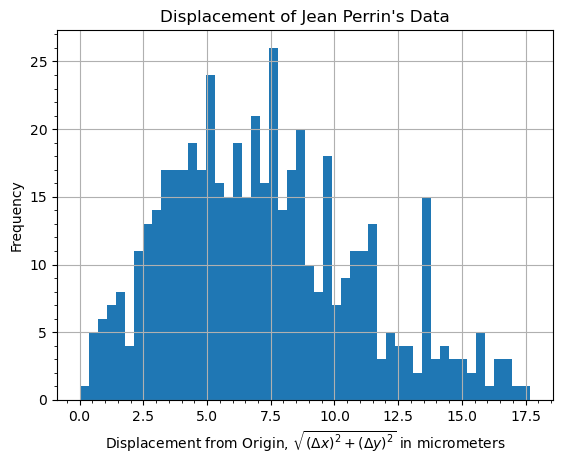

In [6]:
# column of numpy array for displacement
r_value_bwdt = brownian_walk_data['Displacement'].values

plt.hist(r_value_bwdt, bins = 50)
plt.xlabel(r'Displacement from Origin, $\sqrt{ (\Delta x)^2 + (\Delta y)^2}$ in micrometers')
plt.ylabel('Frequency')
plt.title("Displacement of Jean Perrin's Data")
plt.grid(True)
plt.minorticks_on()
plt.show()

In [7]:
#Create a nested for loop to repeat the random walk differently 1000 times

#Define number of steps taken
want_to_walk = 1000

#Define number of walks
num_walks=1000

#Define probability(p) as an array
N=101 #number elements in the array
x=np.arange(0,N) #the array starts at zero, ends at N elements
U=0.002*0.5*(x)**2
dU=np.zeros(101)
p=0.5*(1-dU/2)
p[0]=1
p[-1]=0

#Setting up an aray for all the walks
all_walks=np.zeros((num_walks, want_to_walk+1),dtype=int)

#Starting position for each walk
starting_pos=0
all_walks[:,0]=starting_pos

#Create a for loop for the number of walks
for i in range(num_walks):
    #Nest the for loop for each random loop inside the for loop for num_walks
    #Create a for loop for each random walk
    for n in range(want_to_walk):
      current_pos=all_walks[i,n]
      prob_next_step=(rand()<p[current_pos])
      next_step_taken=(2*prob_next_step-1)
      all_walks[i,n+1]=current_pos+next_step_taken

We define the function `two_dimen_walk` that does a similar process in two dimensions; one for the $x$ direction and one for the $y$ direction.

In [8]:
def two_dimen_walk(number_steps, p_succ):
    """
    Create a two dimensional walk
    """
    # the clever work around is to make a polar plot and then convert to x and y coordinates
    # generate a random angle
    # function to flip a coin
    x_flips = rand(number_steps) < p_succ
    y_flips = rand(number_steps) < p_succ
    # print(flips)

    # Python treats True as 1, and False as 0
    x_steps = 2*x_flips - 1
    y_steps = 2*y_flips - 1
    # print(steps)

    walk_x = np.zeros(number_steps+1)
    walk_y = np.zeros_like(walk_x)
    walk_x[1:] = np.cumsum(x_steps)
    walk_y[1:] = np.cumsum(y_steps)
    return walk_x, walk_y

Now we will simmulate five random walks, each $10\,000$ steps. For this first walk, we will return to a fair probability of a "success" being $p = 0.5$, then comment on the results.

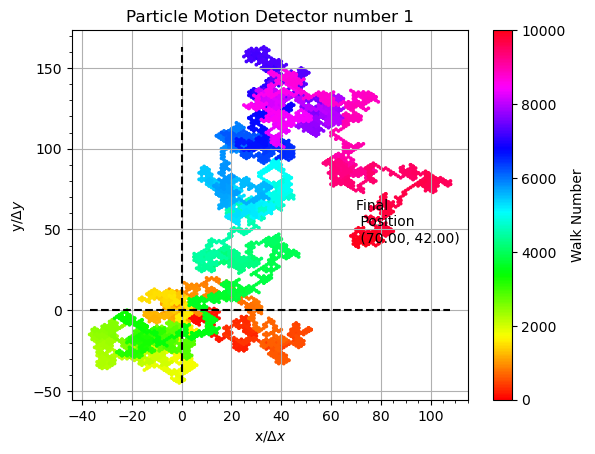

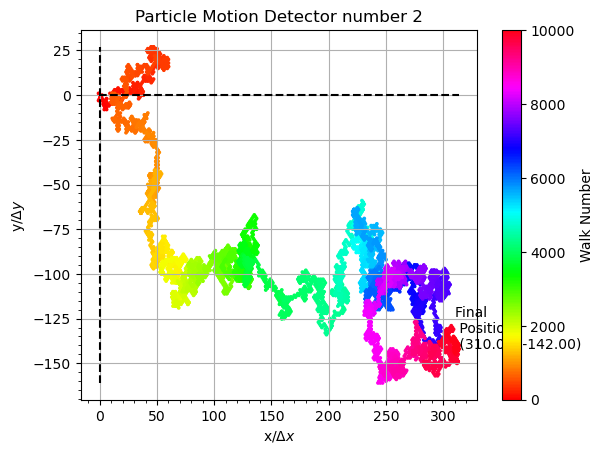

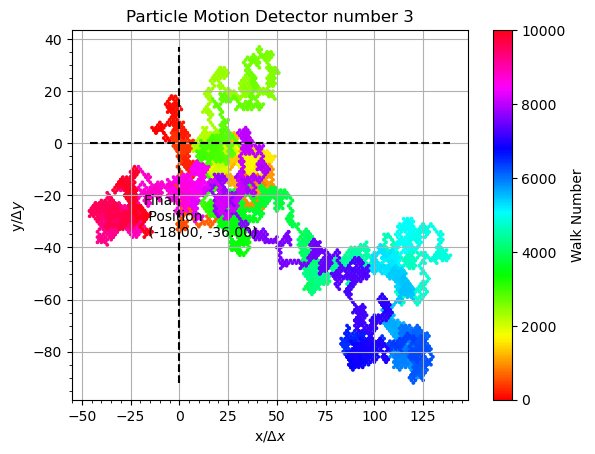

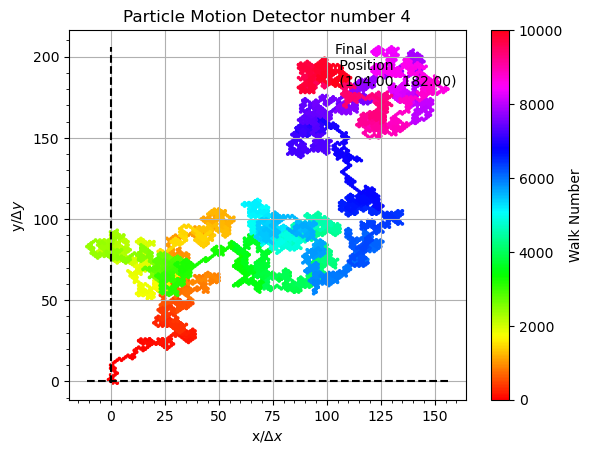

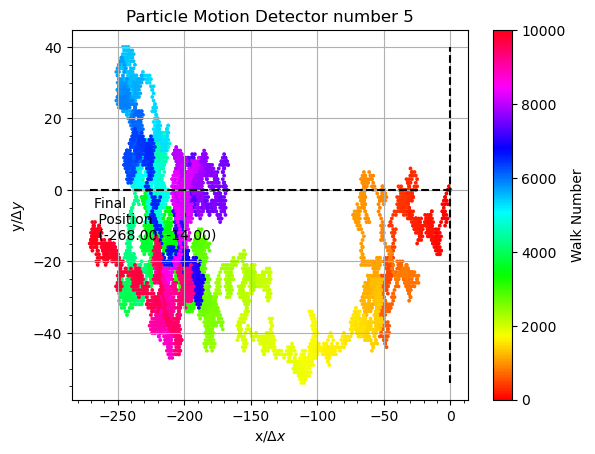

In [9]:
number_walks = 5
number_steps = 10_000
current_probability = 0.5

for n in range(number_walks):
  x_coor, y_coor = two_dimen_walk(number_steps, current_probability)

  # color array to plot time
  # at least until I can annimate
  z_colors = np.linspace(0, number_steps, len(x_coor))
  plt.scatter(x_coor, y_coor, c = z_colors, cmap = 'hsv', s = 3.0)
  # you gotta show what the colors mean!
  plt.colorbar(label = 'Walk Number')
  # # annotate starting and final position
  ending_x, ending_y = x_coor[-1], y_coor[-1]
  plt.text(ending_x, ending_y, "Final \n Position \n ({:.2f}, {:.2f})".format(ending_x, ending_y))
  # spruce up graph
  plt.title("Particle Motion Detector number {}".format(n+1) )
  plt.xlabel(r"x/$\Delta x$")
  plt.ylabel(r"y/$\Delta y$")
  # add x and y axes
  plt.hlines(y = 0, xmin = np.min(x_coor), xmax = np.max(x_coor), colors= "black", linestyles = "dashed")
  plt.vlines(x = 0, ymin = np.min(y_coor), ymax = np.max(y_coor), colors= "black", linestyles = "dashed")
  plt.minorticks_on()
  plt.grid(True)
  plt.show()
  print("\n")

Each particle starts at the origin (labeled at the intersection of the dashed black lines), and continues its walk following ROYGBIV order until the particle reaches red again. At this point, we label its final position as an ordered pair.

Let us again test the same probabilities as the one dimensional walk. That is, $p = 0.8$ and then $p = 0.45$.

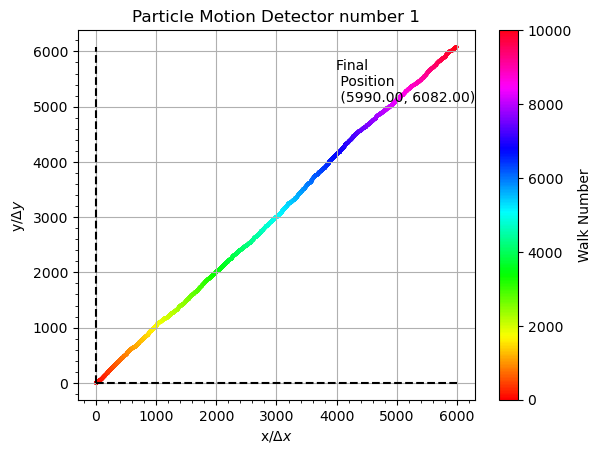

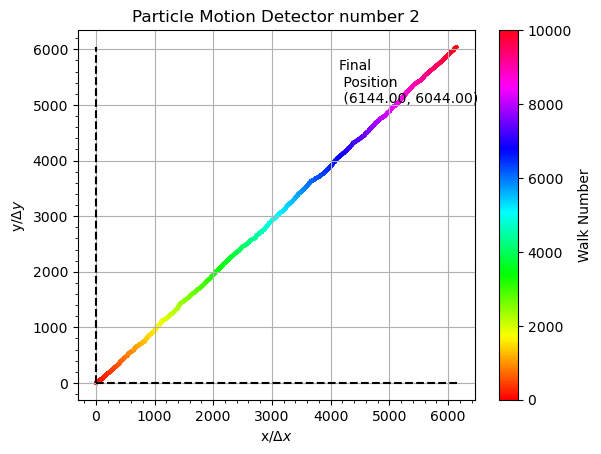

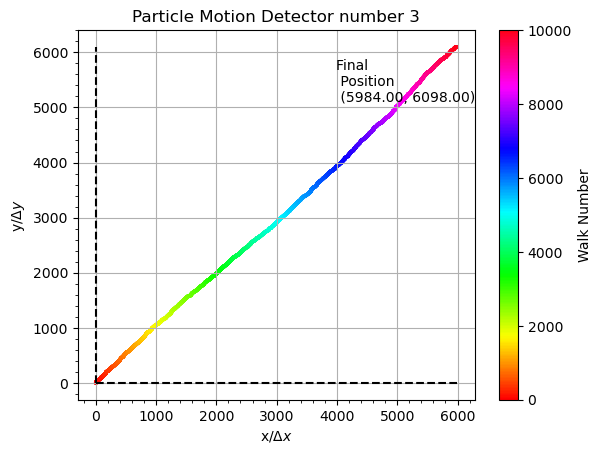

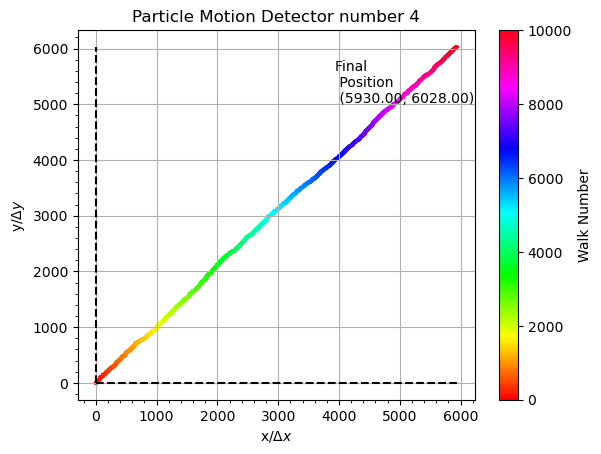

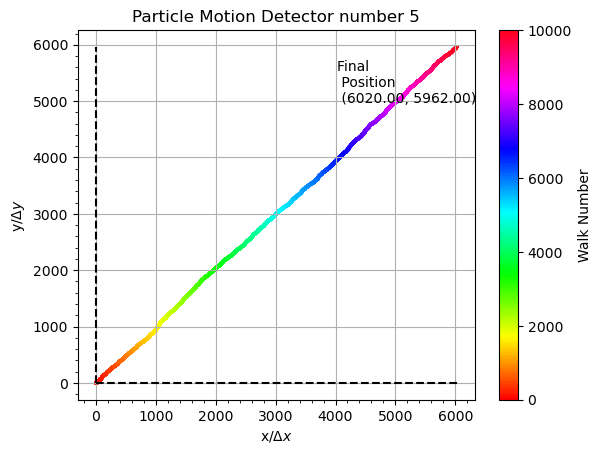

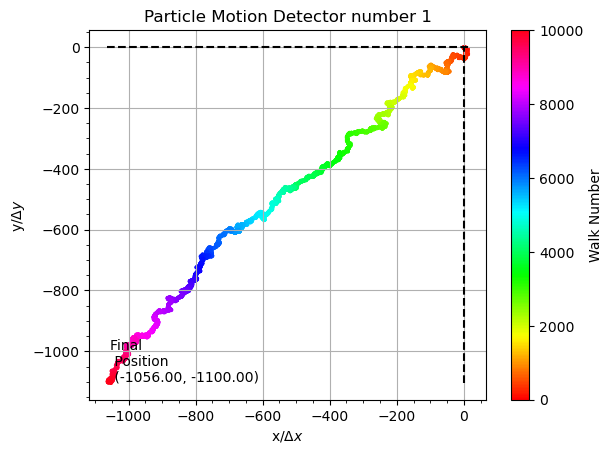

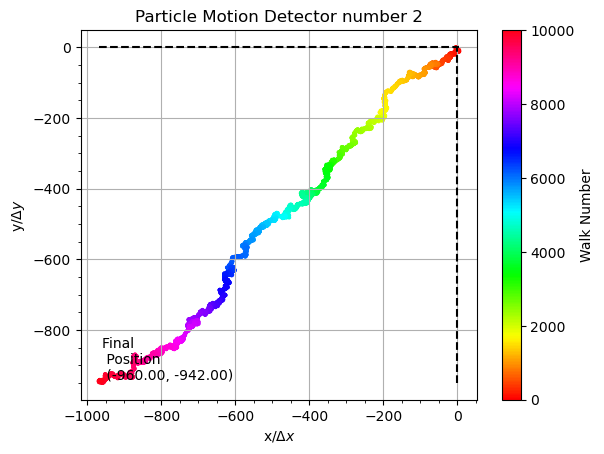

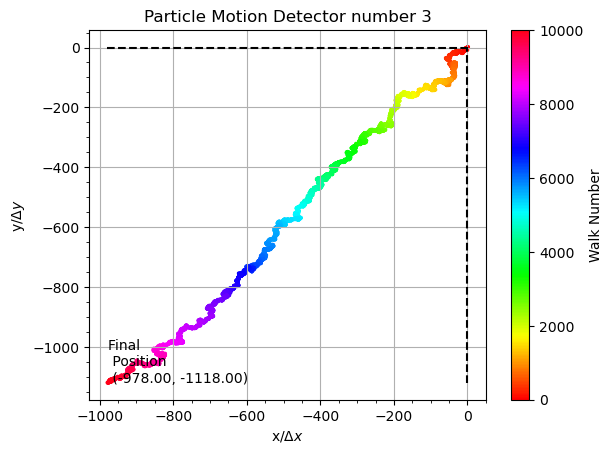

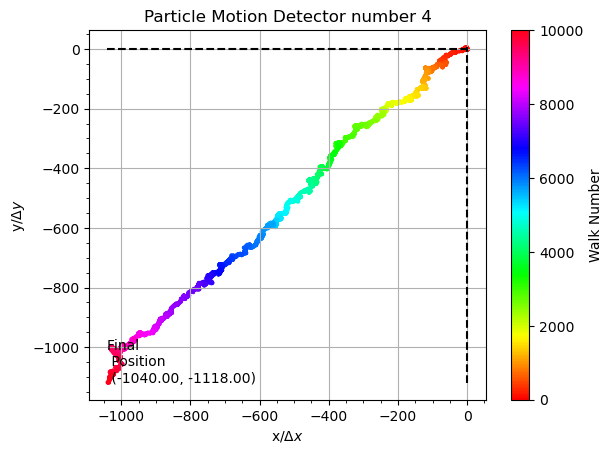

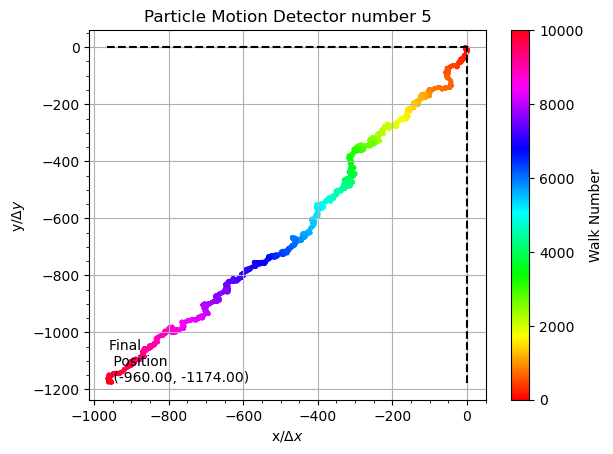

In [10]:
number_walks = 5
number_steps = 10_000
current_probability = 0.8

for n in range(number_walks):
  x_coor, y_coor = two_dimen_walk(number_steps, current_probability)

  # color array to plot time
  # at least until I can annimate
  z_colors = np.linspace(0, number_steps, len(x_coor))
  plt.scatter(x_coor, y_coor, c = z_colors, cmap = 'hsv', s = 3.0)
  # you gotta show what the colors mean!
  plt.colorbar(label = 'Walk Number')
  # # annotate starting and final position
  ending_x, ending_y = x_coor[-1], y_coor[-1]
  plt.text(ending_x - 2000, ending_y - 1000, "Final \n Position \n ({:.2f}, {:.2f})".format(ending_x, ending_y))
  # spruce up graph
  plt.title("Particle Motion Detector number {}".format(n+1) )
  plt.xlabel(r"x/$\Delta x$")
  plt.ylabel(r"y/$\Delta y$")
  # add x and y axes
  plt.hlines(y = 0, xmin = np.min(x_coor), xmax = np.max(x_coor), colors= "black", linestyles = "dashed")
  plt.vlines(x = 0, ymin = np.min(y_coor), ymax = np.max(y_coor), colors= "black", linestyles = "dashed")
  plt.minorticks_on()
  plt.grid(True)
  plt.show()
  print("\n")

# now p = 0.45
current_probability = 0.45

for n in range(number_walks):
  x_coor, y_coor = two_dimen_walk(number_steps, current_probability)

  # color array to plot time
  # at least until I can annimate
  z_colors = np.linspace(0, number_steps, len(x_coor))
  plt.scatter(x_coor, y_coor, c = z_colors, cmap = 'hsv', s = 3.0)
  # you gotta show what the colors mean!
  plt.colorbar(label = 'Walk Number')
  # # annotate starting and final position
  ending_x, ending_y = x_coor[-1], y_coor[-1]
  plt.text(ending_x, ending_y, "Final \n Position \n ({:.2f}, {:.2f})".format(ending_x, ending_y))
  # spruce up graph
  plt.title("Particle Motion Detector number {}".format(n+1) )
  plt.xlabel(r"x/$\Delta x$")
  plt.ylabel(r"y/$\Delta y$")
  # add x and y axes
  plt.hlines(y = 0, xmin = np.min(x_coor), xmax = np.max(x_coor), colors= "black", linestyles = "dashed")
  plt.vlines(x = 0, ymin = np.min(y_coor), ymax = np.max(y_coor), colors= "black", linestyles = "dashed")
  plt.minorticks_on()
  plt.grid(True)
  plt.show()
  print("\n")

Much like the one dimensional walk, we skew in the direction of "positive" when $p > 0.5$, and skew in the direction of "negative" when $p < 0.5$.

After many independent particles have taken $1\,000$ steps, how far away from the origin is each walk?

We assume $p = 0.5$ for an average walk.

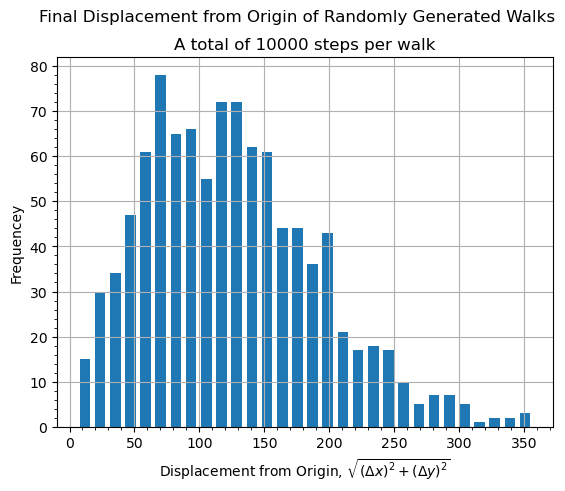

In [11]:
# now let us continue with 1000 random walks, each 10,000 steps
number_walks = 1000
number_steps = 10_000
current_probability = 0.5
# table to store final values
#             x     y     r = sqrt(x^2 + y^2)
# walk 1      x_0   y_0   r_0
# walk 2      x_1   y_1   r_1
# walk 3      x_2   y_2   r_2
# ...
# walk 1000   x_1000 y_1000 r_1000
final_displacements = np.zeros(number_walks)
for n in range(number_walks):
  x_coor, y_coor = two_dimen_walk(number_steps, current_probability)
  # here, we only care about the last point
  x_coor_last, y_coor_last = x_coor[-1], y_coor[-1]

  # calculate displacement given these values
  r_coor_last = np.sqrt(x_coor_last**2 + y_coor_last**2)
  # append this to final_displacements
  final_displacements[n] = r_coor_last

plt.hist(final_displacements, bins=30, rwidth=0.7)
#sns.kdeplot(final_displacements[:,2],color='red',label='PDF')
plt.xlabel(r'Displacement from Origin, $\sqrt{ (\Delta x)^2 + (\Delta y)^2}$')
plt.ylabel('Frequencey')
plt.suptitle('Final Displacement from Origin of Randomly Generated Walks')
plt.title("A total of {} steps per walk".format(number_steps))
plt.grid(True)
plt.minorticks_on()
plt.show()

Looking at our walks, we note the following:
- When $p = 0.5$, we can end up in any quadrant. However, we mostly end up in either Quadrant I or Quadrant III. This is likely due to our method.
- When $p > 0.5$, we heavily walk towards Quadrant I. It is nearly impossible for us to go down or left.
- When $p < 0.5$, we walk towards Quadtrant III. We instead rarely walk up or right.

However, none of these results match with Perrin's dataset. In his data, the single particle seems to start in a random position, but slowly walks towards the center/origin. Why could this be?

# 3: Comparison
One interpretation is a flaw in our assumption: a particle's motion is purely random. However, the motion of atoms in a beaker are not independent; atoms and molecules bounce off of each other, and influence one anothers directions. Another factor is the beaker that the atoms are bound within; thus, creating definitive boundaries. And inside the glass beaker, the single molecule we are tracking is experiencing cohesive forces from like molecules and adhesive forces from other molecules including the molecules that make up the glass walls of our said beaker. In our model, we let our particles roam freely wherever they like, with no forces acting upon them other than the force of changing the probability of a success. Real particles obey boundary conditions and can't escape the boundary they start in.

Another interpretation is Perrin's observed atom (and actually all atoms), is that all atoms want to reach a state of least entropy. This state is achieved when everyone is "bundled" in the middle and don't want to move. Our test particle can wander wherever it wants with no concern for entropy levels.

If we included some kind of force that pushes our particle, or a conditional to "push" our particle away from a set boundary, we could better replicated Perrin's data.
***

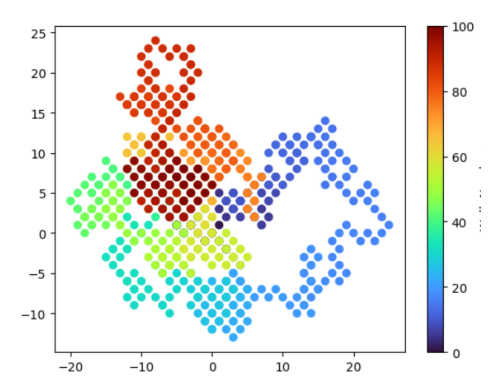

In [12]:
# a funny image produced
photo=plt.imread('chickenhorse.tif')
plt.imshow(photo)
plt.axis('off')
plt.show()

>We import the above because it looks like a chicken (warm colors) on a horse (cool colors). This was created by pure chance when experimenting with $2\text{D}$ random walks. Honeslty, that's really cool. ☺